Time Intervals: 500
Burnt Trees: 448375
Unburnt Trees: 550235
Burning Trees: 1390


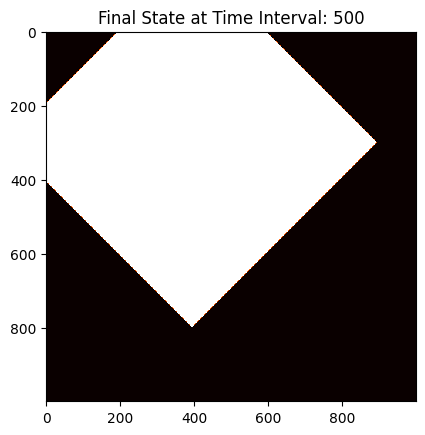

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
GRID_SIZE = 1000
TIME_INTERVALS = 500

# Tree states
UNBURNT = 0
BURNING = 1
BURNT = 2

# Initialize the forest
forest = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Randomly select one tree to burn at the start
initial_burning_tree = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
forest[initial_burning_tree] = BURNING

def spread_fire(forest):
    new_forest = forest.copy()
    burning_trees = np.argwhere(forest == BURNING)
    for tree in burning_trees:
        x, y = tree
        new_forest[x, y] = BURNT
        # Spread fire to neighboring trees
        if x > 0 and forest[x-1, y] == UNBURNT:
            new_forest[x-1, y] = BURNING
        if x < GRID_SIZE - 1 and forest[x+1, y] == UNBURNT:
            new_forest[x+1, y] = BURNING
        if y > 0 and forest[x, y-1] == UNBURNT:
            new_forest[x, y-1] = BURNING
        if y < GRID_SIZE - 1 and forest[x, y+1] == UNBURNT:
            new_forest[x, y+1] = BURNING
    return new_forest

# Simulation
time_intervals = 0

for t in range(TIME_INTERVALS):
    if np.any(forest == BURNING):
        forest = spread_fire(forest)
        time_intervals += 1
    else:
        break

# Count the number of each type of tree
unique, counts = np.unique(forest, return_counts=True)
tree_counts = dict(zip(unique, counts))

burnt_trees = tree_counts.get(BURNT, 0)
burning_trees = tree_counts.get(BURNING, 0)
unburnt_trees = tree_counts.get(UNBURNT, GRID_SIZE * GRID_SIZE - burnt_trees - burning_trees)

print(f"Time Intervals: {time_intervals}")
print(f"Burnt Trees: {burnt_trees}")
print(f"Unburnt Trees: {unburnt_trees}")
print(f"Burning Trees: {burning_trees}")

# Visualization
plt.imshow(forest, cmap='hot', interpolation='nearest')
plt.title(f'Final State at Time Interval: {time_intervals}')
plt.show()


Time Intervals: 100
Burnt Trees: 264551
Unburnt Trees: 731001
Burning Trees: 4448


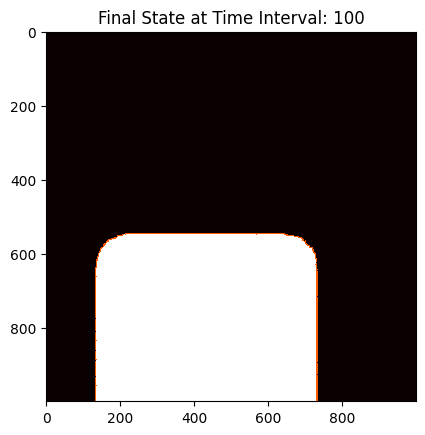

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
GRID_SIZE = 1000
TIME_INTERVALS = 100
PROBABILITY_NON_ADJACENT = 0.4

# Tree states
UNBURNT = 0
BURNING = 1
BURNT = 2

# Initialize the forest
forest = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Randomly select one tree to burn at the start
initial_burning_tree = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
forest[initial_burning_tree] = BURNING

def spread_fire(forest):
    new_forest = forest.copy()
    burning_trees = np.argwhere(forest == BURNING)
    for tree in burning_trees:
        x, y = tree
        new_forest[x, y] = BURNT
        # Spread fire to adjacent trees
        for dx in range(-3, 4):
            for dy in range(-3, 4):
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
                    if forest[nx, ny] == UNBURNT:
                        if abs(dx) <= 1 and abs(dy) <= 1:
                            new_forest[nx, ny] = BURNING
                        elif random.random() < PROBABILITY_NON_ADJACENT:
                            new_forest[nx, ny] = BURNING
    return new_forest

# Simulation
time_intervals = 0

for t in range(TIME_INTERVALS):
    if np.any(forest == BURNING):
        forest = spread_fire(forest)
        time_intervals += 1
    else:
        break

# Count the number of each type of tree
unique, counts = np.unique(forest, return_counts=True)
tree_counts = dict(zip(unique, counts))

burnt_trees = tree_counts.get(BURNT, 0)
burning_trees = tree_counts.get(BURNING, 0)
unburnt_trees = tree_counts.get(UNBURNT, GRID_SIZE * GRID_SIZE - burnt_trees - burning_trees)

print(f"Time Intervals: {time_intervals}")
print(f"Burnt Trees: {burnt_trees}")
print(f"Unburnt Trees: {unburnt_trees}")
print(f"Burning Trees: {burning_trees}")

# Visualization
plt.imshow(forest, cmap='hot', interpolation='nearest')
plt.title(f'Final State at Time Interval: {time_intervals}')
plt.show()
